In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Display all columns of a pandas DataFrame to help us visualize the entire dataset
pd.set_option('display.max_columns',None)

In [2]:
item_categories = pd.read_csv('categories_eng.csv')
item_categories.head(12)

,category_name,category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4
5,Accessories - PSVita,5
6,Accessories - XBOX 360,6
7,Accessories - XBOX ONE,7
8,Tickets (Digital),8
9,Delivery of goods,9


In [3]:
items = pd.read_csv('items_eng.csv').rename({'category_id':'item_category_id'},axis=1)
items.head(5)

,item_id,item_category_id,item_name
0,0,40,!! IN THE POWER OF HAPPINESS (PLAST) D
1,1,76,! ABBYY FineReader 12 Professional Edition Ful...
2,2,40,*** IN THE GLORY OF THE GLORY (UNV) D
3,3,40,*** BLUE WAVE (Univ) D
4,4,40,*** BOX (GLASS) D


In [4]:
shops = pd.read_csv('shops_eng.csv')
shops.head(12)

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 francs",0
1,"! Yakutsk TC ""Central"" fran",1
2,"Adygea TC ""Mega""",2
3,"Balashikha TC ""Oktyabr-Kinomir""",3
4,"Volga TC ""Volga Mall""",4
5,"Vologda SEC ""Marmelad""",5
6,"Voronezh (Plekhanovskaya, 13)",6
7,"Voronezh SEC ""Maksimir""",7
8,"Voronezh SEC City-Park ""Grad""",8
9,Outbound Trade,9


In [5]:
train = pd.read_csv('sales_train.csv')
train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [34]:
test = pd.read_csv('test.csv')
test.head(5)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


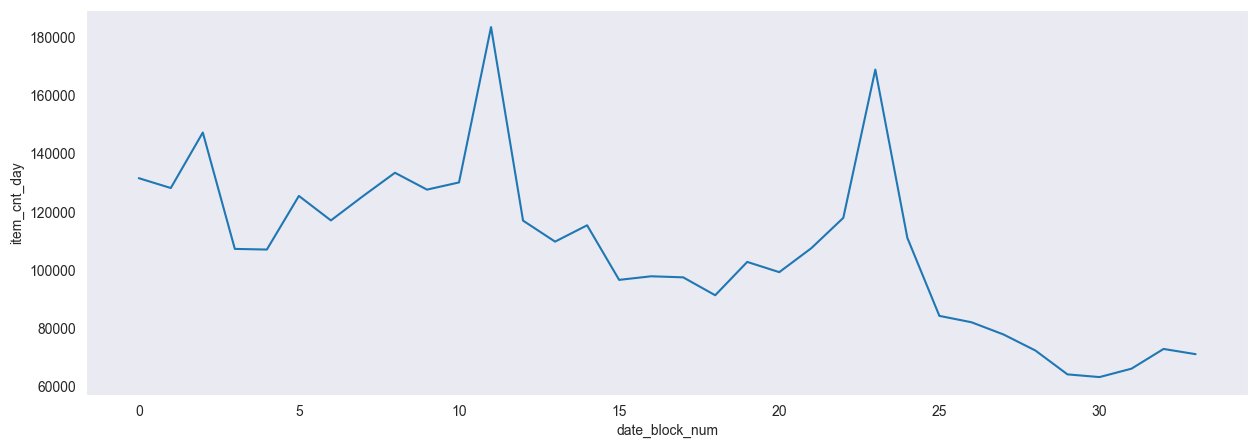

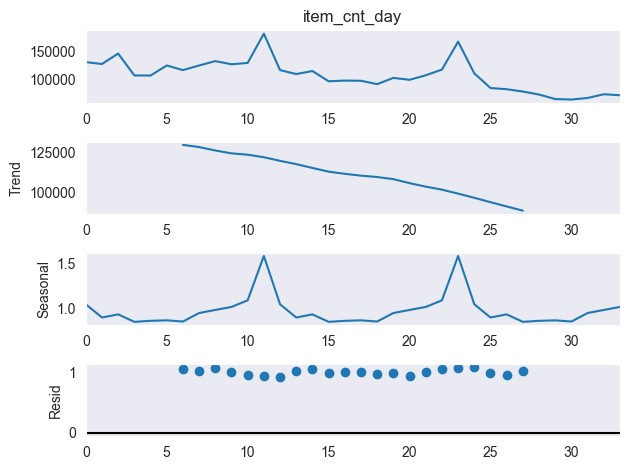

In [18]:
sales_per_month = train.groupby(by='date_block_num')['item_cnt_day'].sum()
plt.figure(figsize=(15,5))
sns.set_style('dark')
sns.lineplot(data=sales_per_month)

decomposition = sm.tsa.seasonal_decompose(sales_per_month,period=12,model='multiplicative')
decomposition.plot();

c:\Users\KYRIAKOS ARISTIDOU\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


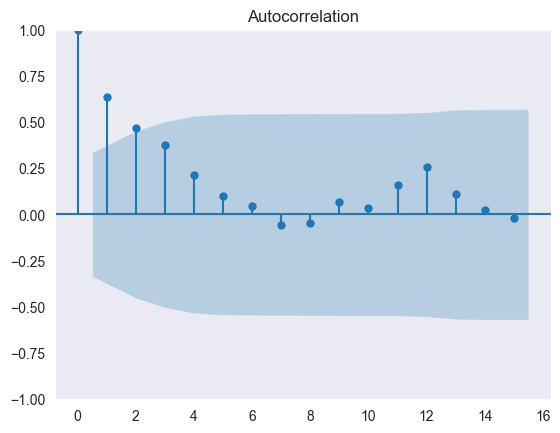

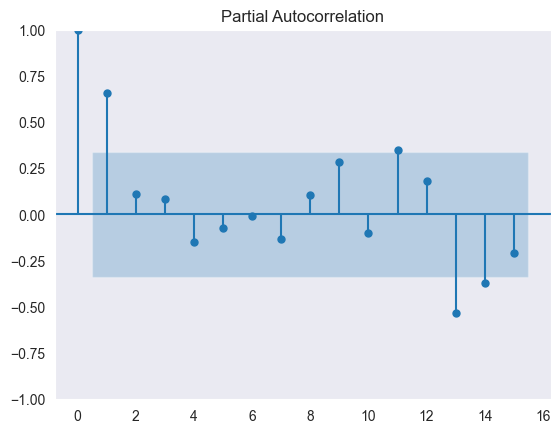

In [19]:
plot_acf(sales_per_month,lags=15);
plot_pacf(sales_per_month,lags=15);

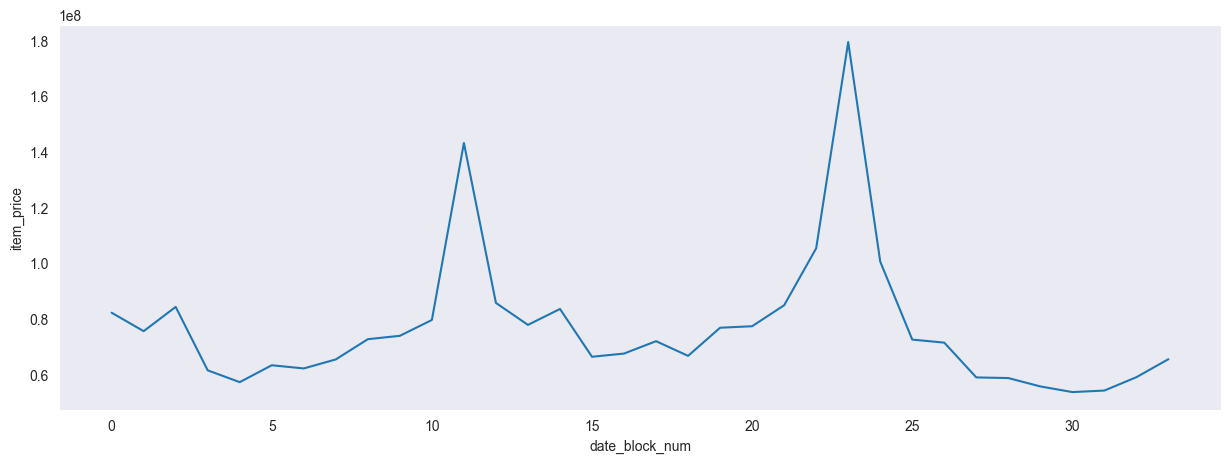

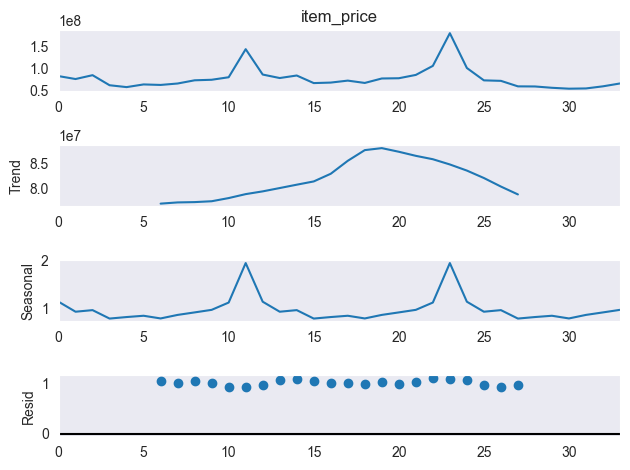

In [20]:
#
plt.figure(figsize=(15,5))
revenue_per_month = train.groupby(by='date_block_num')['item_price'].sum()
sns.lineplot(data=revenue_per_month)

#
decompose = sm.tsa.seasonal_decompose(revenue_per_month,period=12,model='multiplicative')
decompose.plot();

c:\Users\KYRIAKOS ARISTIDOU\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


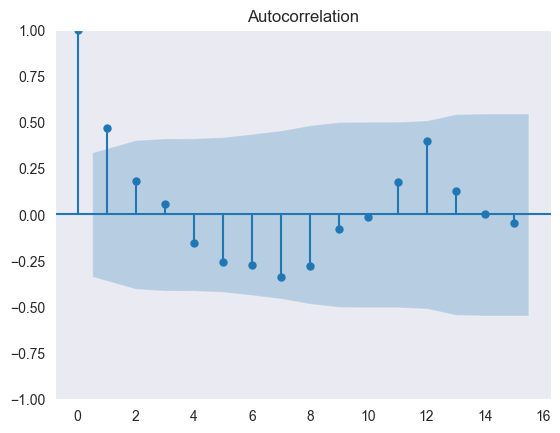

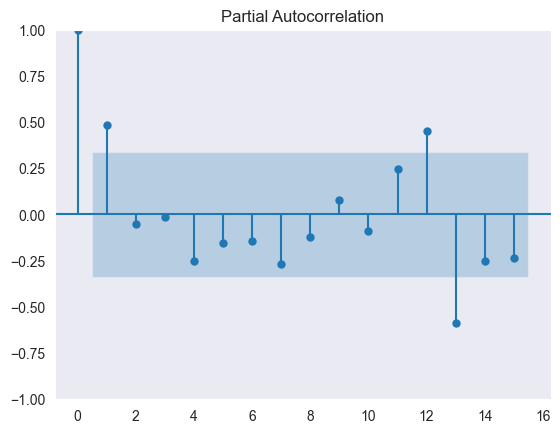

In [21]:
plot_acf(revenue_per_month,lags=15);
plot_pacf(revenue_per_month,lags=15);

Text(0, 0.5, 'Total Sales')

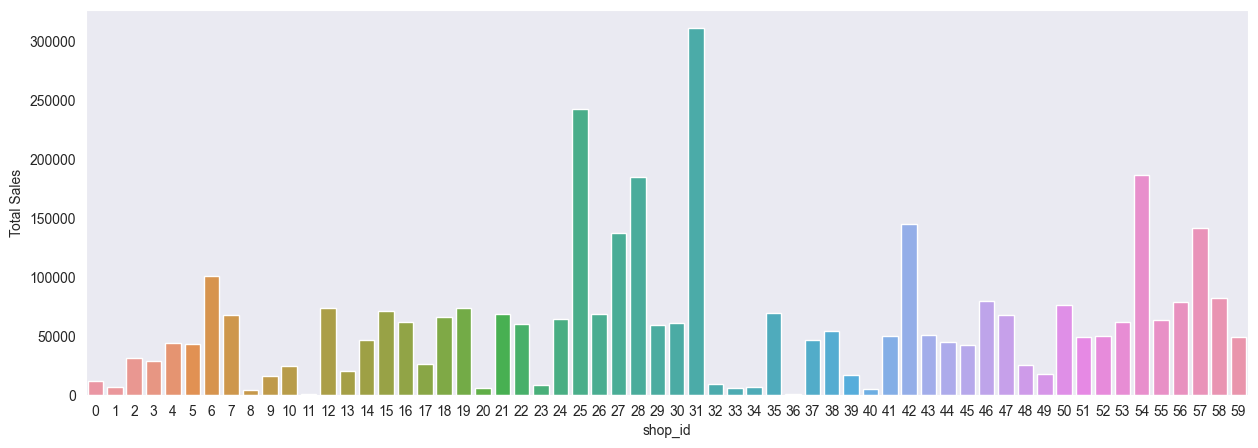

In [22]:
sales_per_shop = train.groupby(by='shop_id')['item_cnt_day'].sum().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(data=sales_per_shop,x='shop_id',y='item_cnt_day')
plt.ylabel('Total Sales')

Text(0, 0.5, 'Total Shops')

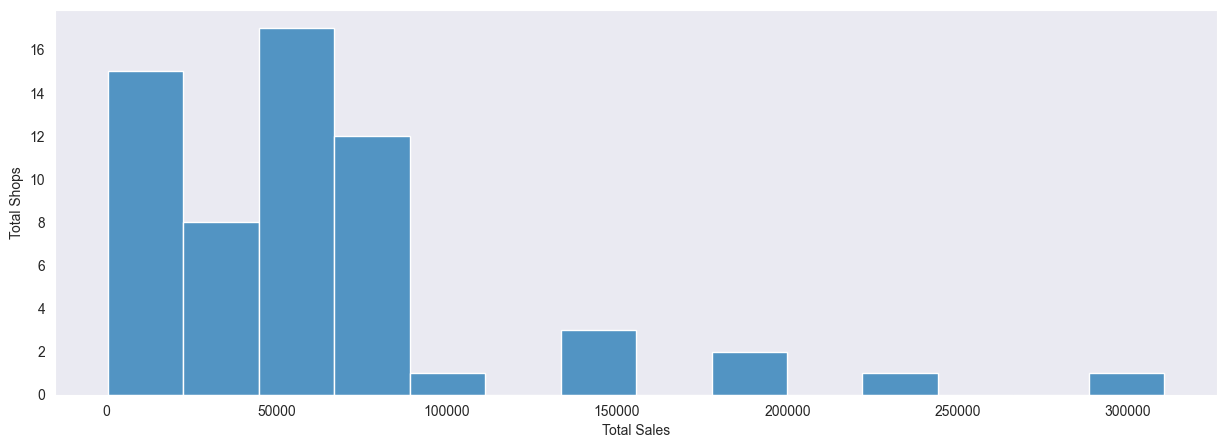

In [23]:
plt.figure(figsize=(15,5))
sns.histplot(data=sales_per_shop,x='item_cnt_day')
plt.xlabel('Total Sales')
plt.ylabel('Total Shops')

<AxesSubplot: xlabel='shop_id', ylabel='item_price'>

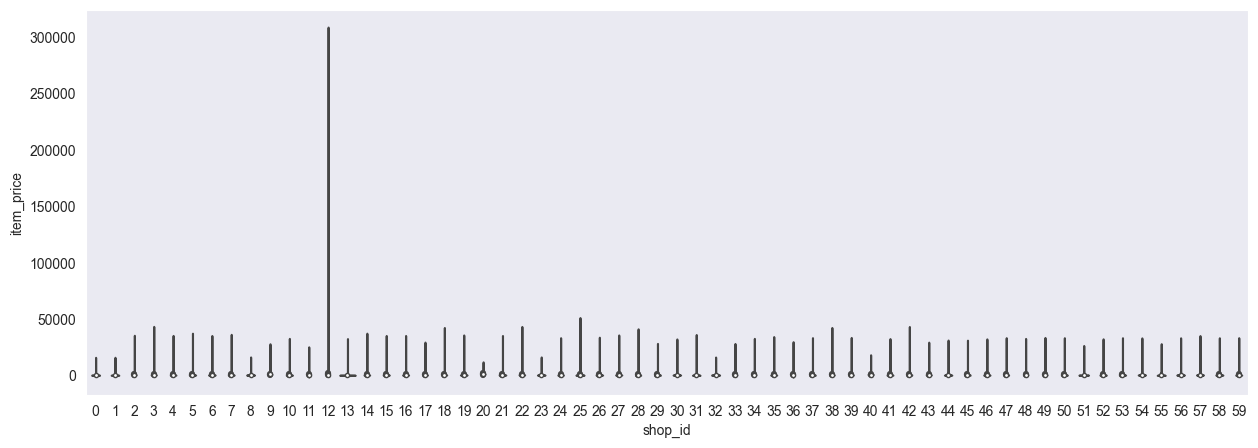

In [24]:
plt.figure(figsize=(15,5))
shop_x_price = train[['shop_id','item_price']]
sns.violinplot(data=shop_x_price,x='shop_id',y='item_price')

In [25]:
sales_per_item = train.groupby(by='item_id')['item_cnt_day'].sum().reset_index()
for percentage, sales in sales_per_item['item_cnt_day'].quantile([0.25,0.5,0.75,1]).iteritems():
    print(str(percentage*100)+f'% of the stores have sold less than {sales} units \n')
#plt.figure(figsize=(15,5))
#sns.kdeplot(data=sales_per_item,x='item_cnt_day',cut=0,alpha=1,fill=True)

25.0% of the stores have sold less than 7.0 units 

50.0% of the stores have sold less than 33.0 units 

75.0% of the stores have sold less than 124.0 units 

100.0% of the stores have sold less than 187642.0 units 



C:\Users\KYRIAKOS ARISTIDOU\AppData\Local\Temp\ipykernel_13060\3060361995.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for percentage, sales in sales_per_item['item_cnt_day'].quantile([0.25,0.5,0.75,1]).iteritems():


In [36]:
print(sales_per_item)

       item_id  item_cnt_day
0            0           1.0
1            1           6.0
2            2           2.0
3            3           2.0
4            4           1.0
...        ...           ...
21802    22165           2.0
21803    22166         348.0
21804    22167        1320.0
21805    22168           6.0
21806    22169           1.0

[21807 rows x 2 columns]


C:\Users\KYRIAKOS ARISTIDOU\AppData\Local\Temp\ipykernel_13060\4002011066.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for percentage, price in train['item_price'].quantile([0.25,0.5,0.75,1]).iteritems():


25.0% of the items are sold for less than $249.0 

50.0% of the items are sold for less than $399.0 

75.0% of the items are sold for less than $999.0 

100.0% of the items are sold for less than $307980.0 



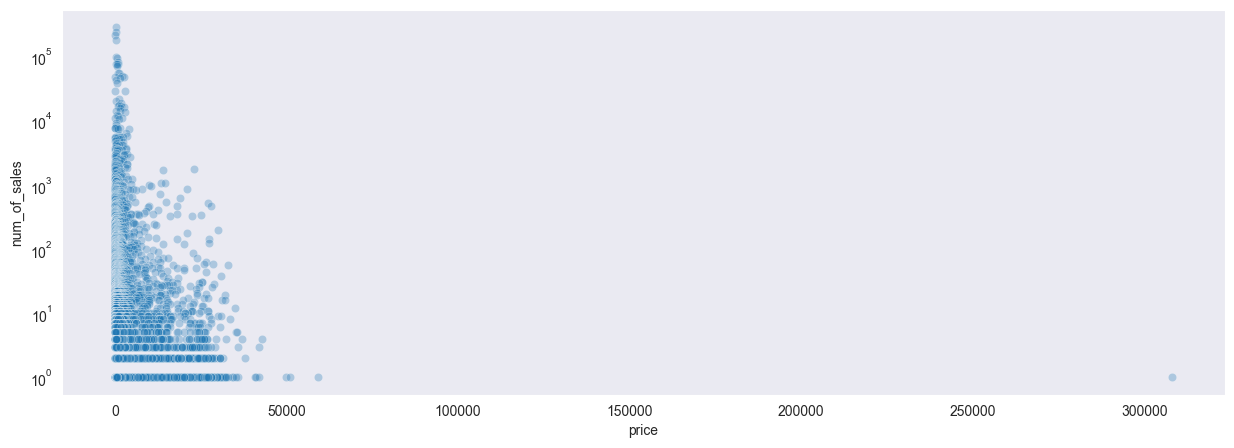

In [26]:
for percentage, price in train['item_price'].quantile([0.25,0.5,0.75,1]).iteritems():
    print(str(percentage*100)+f'% of the items are sold for less than ${price} \n')

#
#plt.figure(figsize=(15,5))
#sns.kdeplot(data=train,x='item_price',cut=0,fill=True,alpha=1)


#
plt.figure(figsize=(15,5))
sales_x_price = train['item_price'].value_counts().reset_index().rename({'index':'price','item_price':'num_of_sales'},axis=1)
sns.scatterplot(data=sales_x_price,x='price',y='num_of_sales',alpha=0.3).set_yscale('log')

Text(0, 0.5, 'Total Sales')

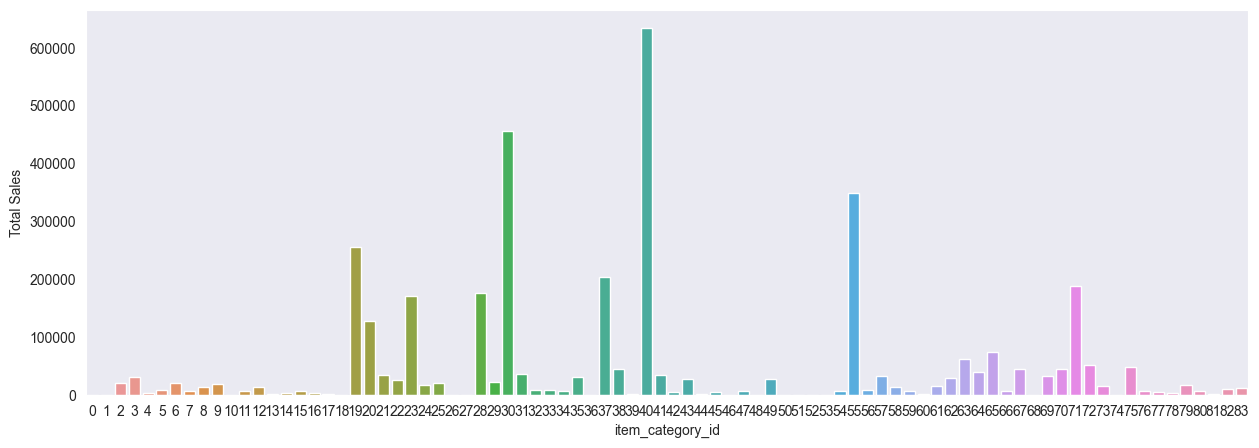

In [27]:
plt.figure(figsize=(15,5))
sales_per_category = pd.DataFrame(train.merge(items,how='left',on='item_id').groupby(by=['item_category_id'])['item_cnt_day'].sum().reset_index())
sns.barplot(data=sales_per_category,x='item_category_id',y='item_cnt_day')
plt.ylabel('Total Sales')

Text(0, 0.5, 'Total Categories')

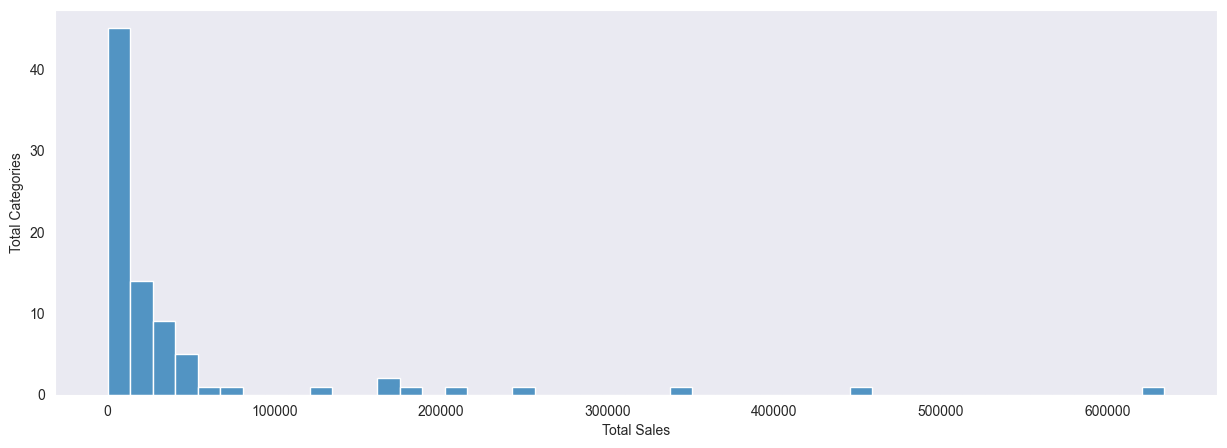

In [28]:
plt.figure(figsize=(15,5))
sns.histplot(data=sales_per_category,x='item_cnt_day')
plt.xlabel('Total Sales')
plt.ylabel('Total Categories')

<AxesSubplot: xlabel='item_category_id', ylabel='item_price'>

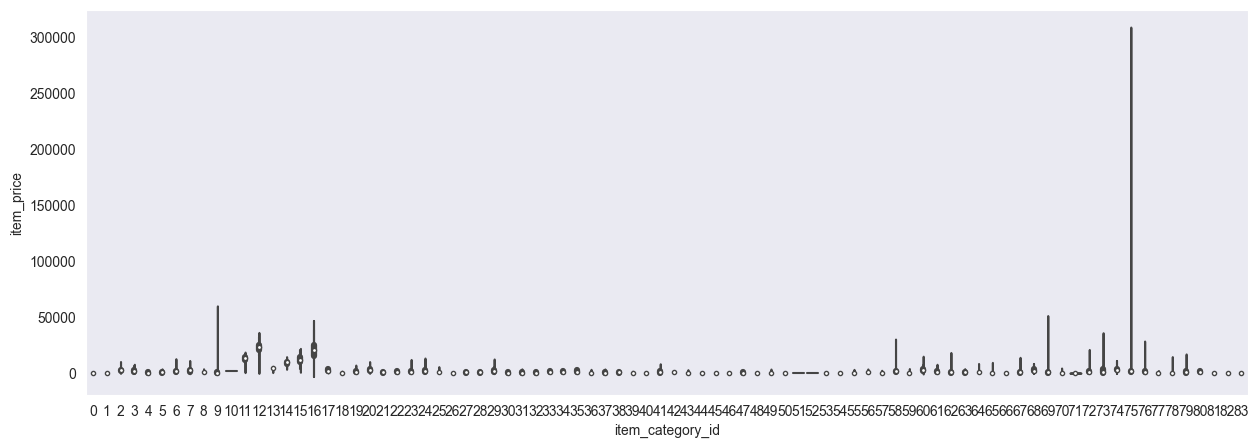

In [29]:
plt.figure(figsize=(15,5))
category_x_price = pd.DataFrame(train.merge(items,how='left',on='item_id'))[['item_category_id','item_price']]
sns.violinplot(data=category_x_price,x='item_category_id',y='item_price')

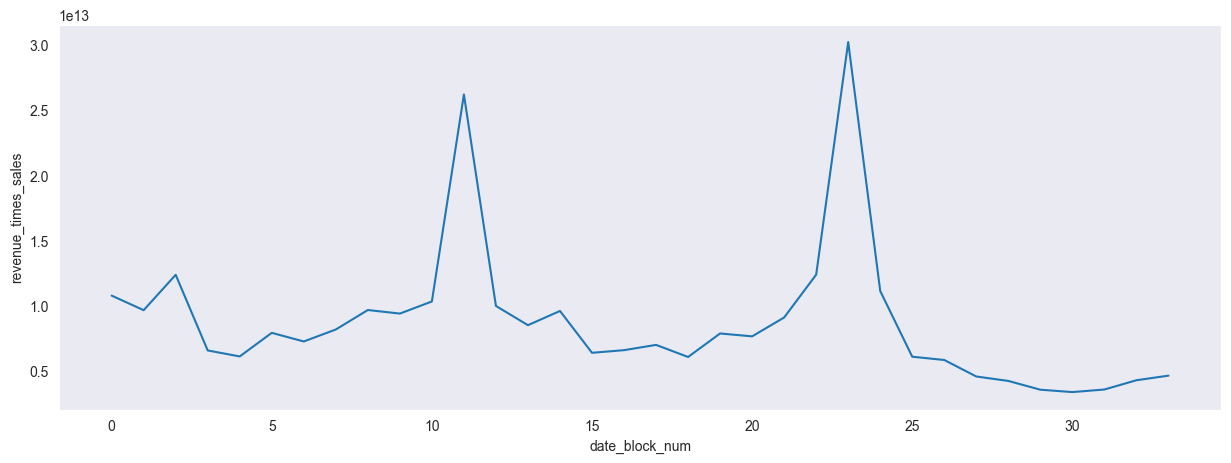

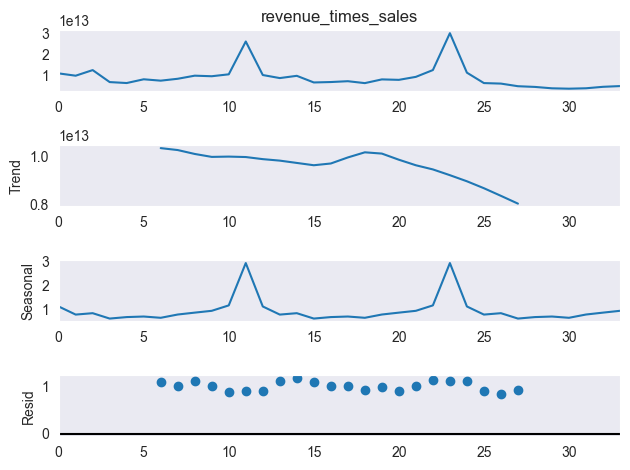

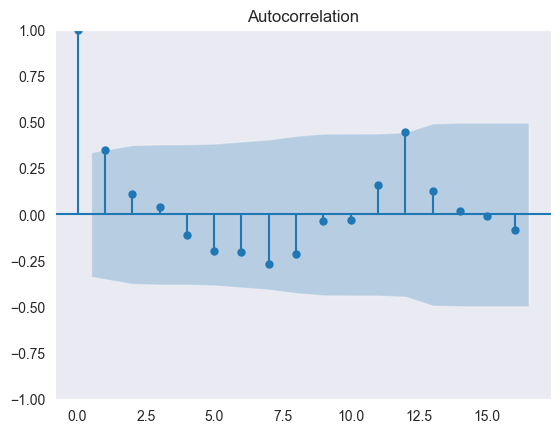

In [30]:
plt.figure(figsize=(15,5))
rev_times_sales_df = train[train['item_cnt_day'] >= 0].groupby(by='date_block_num')[['item_price','item_cnt_day']].sum()
rev_times_sales_df['revenue_times_sales'] = rev_times_sales_df['item_price']*rev_times_sales_df['item_cnt_day']
rev_times_sales_df.reset_index()
sns.lineplot(data=rev_times_sales_df,x='date_block_num',y='revenue_times_sales')
decompose = sm.tsa.seasonal_decompose(rev_times_sales_df['revenue_times_sales'],period=12,model='multiplicative')
decompose.plot();
plot_acf(rev_times_sales_df['revenue_times_sales']);